# Unsupervised Learning tutorial

### Load data
* We'll be starting off using the iris dataset

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
iris = datasets.load_iris()

### Print out the dictionary keys and the dataset description
* Save data and target to their own variables, and print their shape

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
data_array = iris['data']
data_array.shape
print(data_array[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [5]:
target_array = iris['target']
target_array.shape
print(target_array[100:120])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Use your target array to make a list (called color_list) with different colors for the different targets
* With matplotlib's scatter function, make 2D plots comparing the different dimensions (use the color_list to ID the different classes)

In [7]:
colour_list = []

In [8]:
for i, target in enumerate(target_array):
    if target == 0:
        colour_list.append('mediumseagreen')
    elif target == 1:
        colour_list.append('royalblue')
    elif target == 2:
        colour_list.append('mediumorchid')
print(colour_list)

['mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalbl

Text(0, 0.5, 'sepal width (cm)')

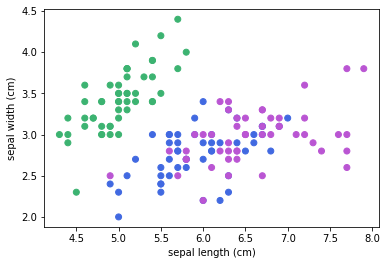

In [9]:
plt.scatter(data_array[:, 0],data_array[:,1], c=colour_list)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# plt.legend(iris.target_names[[

In [10]:
df = pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df = df.assign(species = iris['target'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


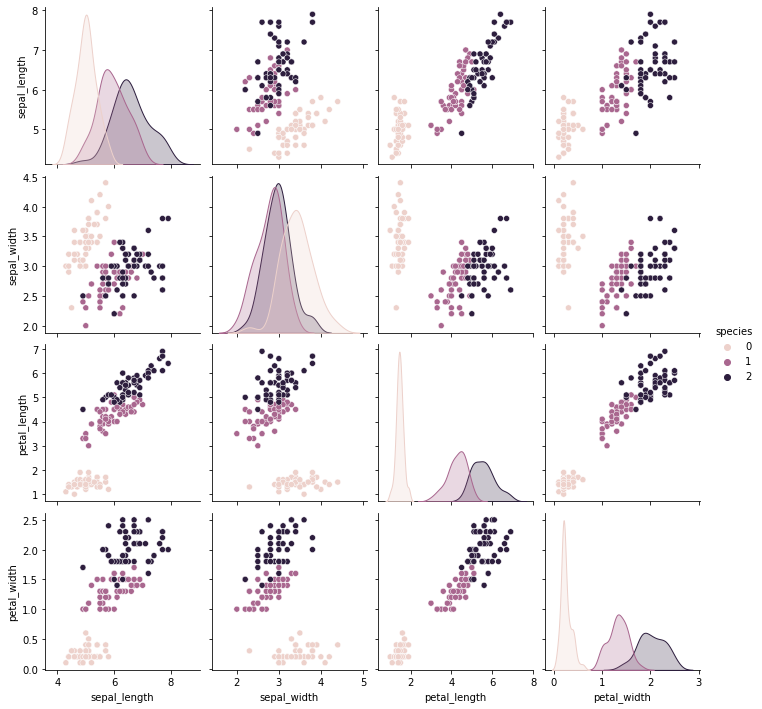

In [11]:
sns.pairplot(df, hue = 'species')

### PCA
look up and implement PCA from sklearn
* Plot the transformed data
* print the explained variance

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()

In [14]:
components = pca.fit_transform(data_array)

In [15]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [16]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

Text(0.5, 1.0, 'PCA Plot')

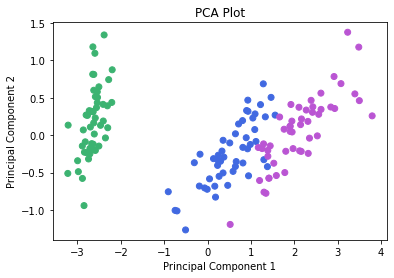

In [17]:
plt.scatter(components[:,0], components[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
#plt.legend(f' 0: Iris-Setosa \
 #          1: Iris-Versicolour] \
  #         2: Iris-Virginica')

In [18]:
#df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
#pca = PCA(n_components=2)
#pca.fit(df_iris[iris.feature_names])
#df_2D = pd.DataFrame(pca.transform(df_iris[iris.feature_names]),
 #                    columns=['PCA1', 'PCA2'])
#df_2D = df_2D.assign(species = iris['target'])
#df_2D['species'] = df_iris['species']
#df_2D.head()

### t-SNE
* non-linear transformation (unlike PCA) - keeps similar instances close and dissimilar ones further apart
* UMAP is similar - but is not part of sklearn, instead called umaplearn

In [19]:
from sklearn.manifold import TSNE

In [20]:
data_array_embedded = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=30).fit_transform(data_array)

/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Text(0.5, 1.0, 't-SNE Plot')

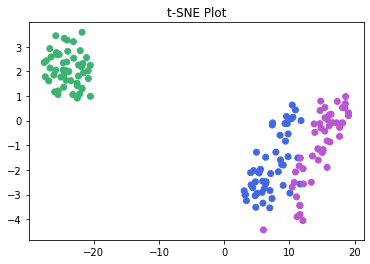

In [21]:
plt.scatter(data_array_embedded[:,0], data_array_embedded[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.title('t-SNE Plot')

### KMeans
* Implement KMeans from sklearn on the iris dataset -> there are 3 clusters so set number of clusters to 3
* Make a color_list_kmeans, and use it to make a scatter plot to compare with the real labels
NB: algorithm takes in number of clusters as a parameter. Tries to find the centre of different collections of points (one per cluster; known as the centroid). Samples are then assigned to a cluster based on their distance from the centroid.

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_array)

In [24]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [25]:
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [26]:
centers = kmeans.cluster_centers_

In [27]:
colour_list_kmeans = []

In [28]:
for label in kmeans.labels_:
    if label == 0:
        colour_list_kmeans.append('mediumseagreen')
    elif label == 1:
        colour_list_kmeans.append('royalblue')
    elif label == 2:
        colour_list_kmeans.append('mediumorchid')
print(colour_list_kmeans)

['royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'mediumseagreen', 'mediumseagreen', 'mediumorchid', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 'mediumse

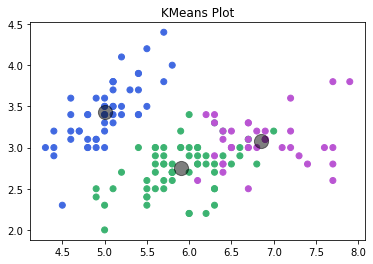

In [29]:
plt.scatter(data_array[:,0], data_array[:,1],c=colour_list_kmeans) # plot the first 2 components that have the highest variance
plt.title('KMeans Plot')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Text(0.5, 1.0, 'KMeans Plot with TSNE')

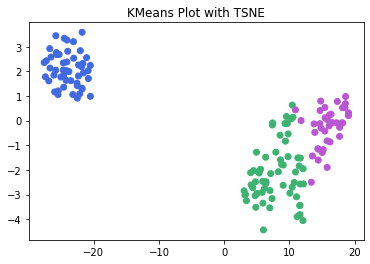

In [30]:
plt.scatter(data_array_embedded[:,0], data_array_embedded[:,1],c=colour_list_kmeans) # plot the first 2 components that have the highest variance
plt.title('KMeans Plot with TSNE')

/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


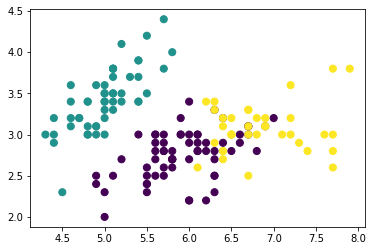

In [31]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(data_array)
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels,
            s=50, cmap='viridis')

### UMAP


In [32]:
# conda install numba

Solving environment: done

## Package Plan ##

  environment location: /Users/judithsayers/opt/anaconda3

  added / updated specs:
    - numba


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-22.9.0-py39h6e9494~ --> pkgs/main::conda-22.9.0-py39hecd8cb5_0 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [33]:
# conda install scipy

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [34]:
# conda install -c conda-forge tqdm

Solving environment: done

## Package Plan ##

  environment location: /Users/judithsayers/opt/anaconda3

  added / updated specs:
    - tqdm


The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39hecd8cb5_0 --> conda-forge::conda-22.9.0-py39h6e9494a_1 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [35]:
# pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
mamba install umap-learn

In [36]:
import umap

In [47]:
umap_embedding_5 = umap.UMAP(n_neighbors=5, min_dist=0.1, metric='correlation').fit_transform(data_array)

In [45]:
umap_embedding_10 = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='correlation').fit_transform(data_array)

In [43]:
umap_embedding_20 = umap.UMAP(n_neighbors=20, min_dist=0.1, metric='correlation').fit_transform(data_array)

In [49]:
umap_embedding_30 = umap.UMAP(n_neighbors=30, min_dist=0.1, metric='correlation').fit_transform(data_array)

In [39]:
umap_embedding_10[1:10]

array([[ 8.71052  ,  7.8083534],
       [ 9.007225 ,  7.3450656],
       [ 9.041388 ,  7.502477 ],
       [10.316525 ,  9.056476 ],
       [11.366037 ,  9.652046 ],
       [ 9.330277 ,  7.2796946],
       [ 9.992604 ,  8.643666 ],
       [ 8.6676235,  7.07946  ],
       [ 8.968692 ,  8.00005  ]], dtype=float32)

Text(0.5, 1.0, 'UMAP Plot with 5 nearest neighbours')

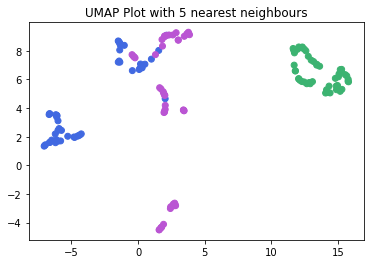

In [48]:
plt.scatter(umap_embedding_5[:,0], umap_embedding_5[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.title('UMAP Plot with 5 nearest neighbours')

Text(0.5, 1.0, 'UMAP Plot with 10 nearest neighbours')

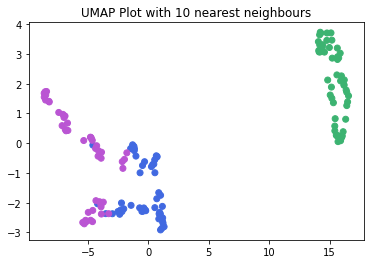

In [46]:
plt.scatter(umap_embedding_10[:,0], umap_embedding_10[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.title('UMAP Plot with 10 nearest neighbours')

Text(0.5, 1.0, 'UMAP Plot with 20 nearest neighbours')

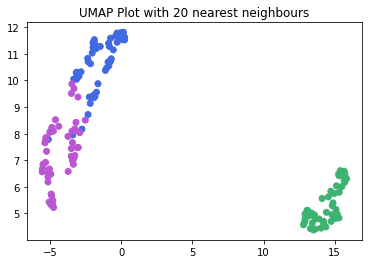

In [44]:
plt.scatter(umap_embedding_20[:,0], umap_embedding_20[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.title('UMAP Plot with 20 nearest neighbours')

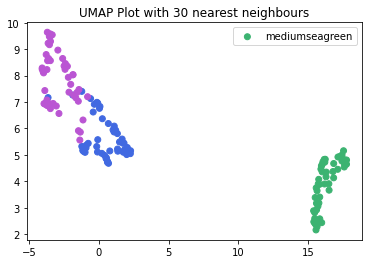

In [64]:
plt.scatter(umap_embedding_30[:,0], umap_embedding_30[:,1], c=colour_list) # plot the first 2 components that have the highest variance
plt.title('UMAP Plot with 30 nearest neighbours')
plt.legend(colour_list[:])

In [59]:
import numpy as np
colour_list_uniq = np.unique(colour_list)
colour_list_uniq

array(['mediumorchid', 'mediumseagreen', 'royalblue'], dtype='<U14')

In [62]:
import umap.plot

<AxesSubplot:>

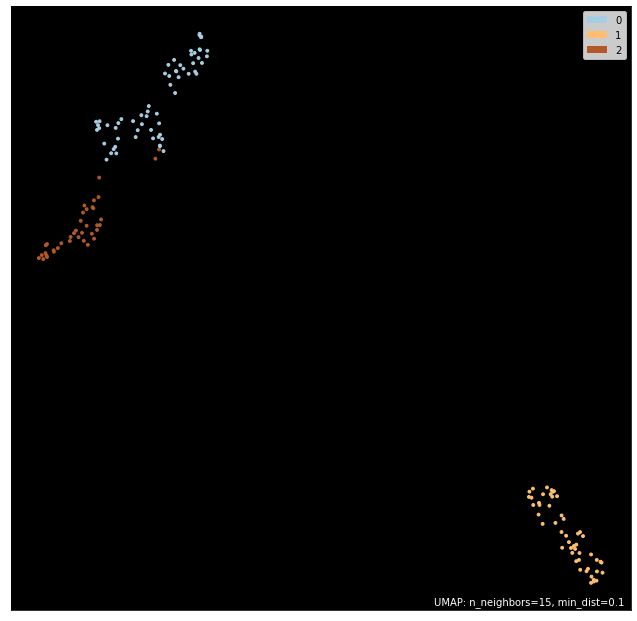

In [68]:
mapper = umap.UMAP().fit(data_array)
umap.plot.points(mapper, labels=kmeans.labels_, color_key_cmap='Paired', background='black')

In [ ]:
hover_data = pd.DataFrame({'index':np.arange(150),
                           'label':kmeans.labels_[:150]})
hover_data['item'] = hover_data.label.map(
    {
        '0':'',
        '1':'',
        '2':'',
    }
)


In [72]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [70]:
data_array[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
import matplotlib.patches as mpatches
pop_a = mpatches.Patch(color='cyan', label='insert name')
pop_b = 